<a href="https://colab.research.google.com/github/chrishunt11/Prediction-of-Loan-Applications/blob/main/Prediction_of_Loan_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Loan Applications
Name: Christopher Hunt

## Project Overview

Link to original dataset from Kaggle:
- [Eligibilty Prediction for Loan](https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan)

Data Dictionary:
- [Loan Data Dictionary](https://drive.google.com/file/d/19zb-Z80Pt9fRZN7Khs8q3t3m3xrAu6bk/view?usp=sharing)

Objective:
- The objective of this project is to build a model that can correctly predict whether a customer is eligible for a loan or not depending on some variables.

### Load and Inspect the Data

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier


# reading the file using pandas and assigning it to df
fname = '/content/drive/MyDrive/Practice/Loan Prediction/Data/Loan_Data.csv'
df = pd.read_csv(fname, index_col='Loan_ID')
# displaying the first 5 rows
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Taking a look at the amount of rows, columns in the dataset
print(f'There are {df.shape[0]} columns and {df.shape[1]} rows in this dataset.')

There are 614 columns and 12 rows in this dataset.


In [3]:
# Looking at the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


### Cleaning the Data

#### Addressing any duplicate rows

In [4]:
# checking for duplicate rows
df.duplicated().sum()

0

There are no duplicate rows in this dataset

#### Addressing any wrong dtypes

In [5]:
# checking dtypes
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Everything looks like it is the correct data type.

#### Identifying any inconsistent/impossible values

In [6]:
# addressing any inconsistent values
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
  print(f'Value count: {col}')
  print(df[col].value_counts())
  print('\n')

Value count: Gender
Male      489
Female    112
Name: Gender, dtype: int64


Value count: Married
Yes    398
No     213
Name: Married, dtype: int64


Value count: Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Value count: Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Value count: Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64


Value count: Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Value count: Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64




There does not appear to be any inconsistencies

In [7]:
# Using a for loop to check out the stats for all numerical columns
num_cols = df.select_dtypes('number').columns
for col in num_cols:
  print(f'Stats for: {col}')
  print(df[col].describe())
  print('\n')

Stats for: ApplicantIncome
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


Stats for: CoapplicantIncome
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


Stats for: LoanAmount
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


Stats for: Loan_Amount_Term
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


Stats for: Credit_History
count    564.000000
mean       0.842199
std   

Everything Looks okay here.

In [8]:
# Checking Loan Amount Term Value Counts
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [9]:
# Checking Dependents Value Counts
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Everything looks good here

In [10]:
# Checking for null values
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We will address these missing values in the preprocessing process

In [11]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [12]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [13]:
df = df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'])

In [14]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
Loan_ID,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0


## Exploratory

### Correlation Map

In [15]:
# creating a correlation in the dataframe
corr = df.corr(numeric_only=True)
corr

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
LoanAmount,1.000000,0.039447,-0.008433,0.624621
Loan_Amount_Term,0.039447,1.000000,0.001470,-0.069948
Credit_History,-0.008433,0.001470,1.000000,-0.015109
TotalIncome,0.624621,-0.069948,-0.015109,1.000000


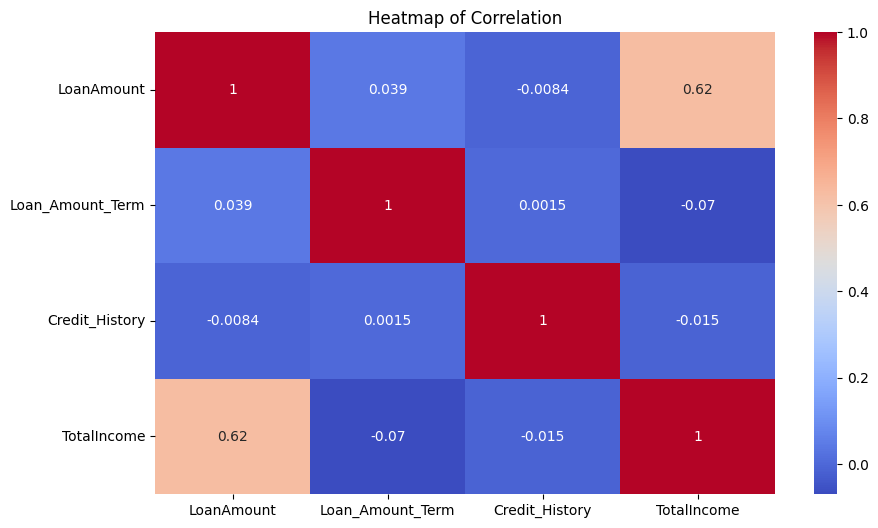

In [16]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a heatmap
ax = sns.heatmap(corr, cmap='coolwarm', annot=True);
ax.set_title('Heatmap of Correlation');

As we can see from the correlation graph above, there is a moderately strong correlation between Loan Amount and Applicant Income (.57).

### Histogram of Loan Amount

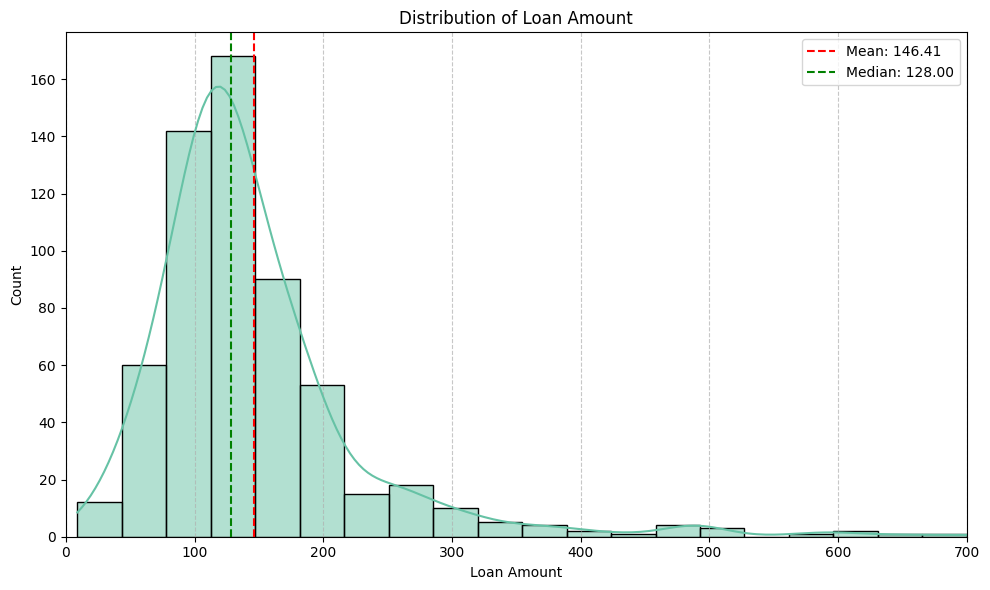

In [17]:
def plot_hist_loan(df):
    plt.figure(figsize=(10, 6))

    # Set a color palette for the plot
    sns.set_palette("Set2")

    # Creating a histogram of Loan Amount with KDE (Kernel Density Estimate)
    ax = sns.histplot(data=df, x='LoanAmount', kde=True, bins=20)  # Adjust the number of bins as needed

    # Adding vertical grid lines
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    # Adding axis labels and a title
    ax.set_title('Distribution of Loan Amount')
    ax.set_xlabel('Loan Amount')
    ax.set_ylabel('Count')

    # Adding a legend
    ax.legend(['Histogram', 'KDE'])

    # Setting x-axis limits for better readability
    ax.set_xlim(0, df['LoanAmount'].max())

    # Adding mean and median lines
    mean_loan = df['LoanAmount'].mean()
    median_loan = df['LoanAmount'].median()
    ax.axvline(mean_loan, color='red', linestyle='--', label=f'Mean: {mean_loan:.2f}')
    ax.axvline(median_loan, color='green', linestyle='--', label=f'Median: {median_loan:.2f}')


    # Adding legend
    ax.legend()

    # Tight layout
    plt.tight_layout()

    plt.show()

plot_hist_loan(df)

As we can see from the Histogram above, majority of the Loan Amounts are just over $100.

### Countplot of Gender

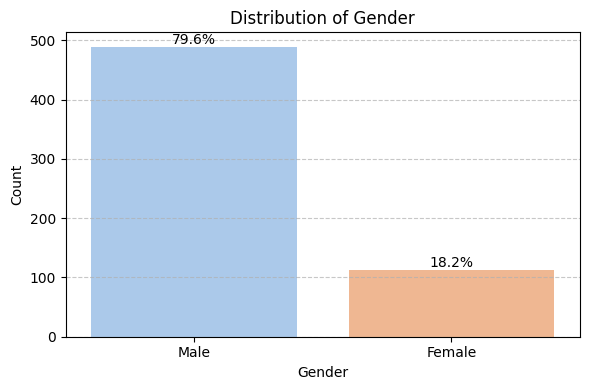

In [18]:
def gender_count(df):
    # Set a color palette for the plot
    sns.set_palette("pastel")

    # Changing the size of the figure
    plt.figure(figsize=(6, 4))

    # Creating a countplot of Gender
    ax = sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index)

    # Adding grid lines and customizing grid style
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding a title, xlabel, and ylabel
    ax.set_title('Distribution of Gender')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')


    # Adding percentage annotations
    total_count = len(df)
    for p in ax.patches:
        percentage = (p.get_height() / total_count) * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 0),
                    textcoords='offset points')
    # Tight layout
    plt.tight_layout()

    plt.show()
gender_count(df);

As we can see from the graph above, approximately 80% of the customers requesting for loans are Male.

### Barplot

In [19]:
# Grouping together Gender and Loan Amount
avg_gender_loan_amount = df.groupby('Gender')['LoanAmount'].mean().round(2).sort_values(ascending=False).reset_index()

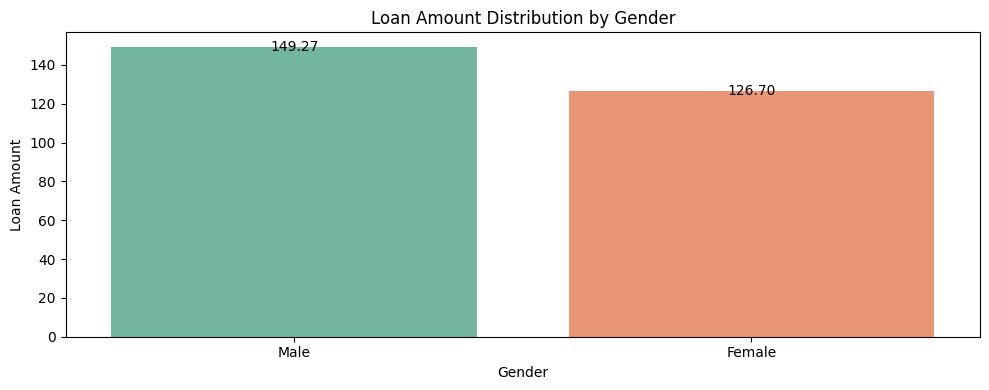

In [20]:
def plot_gender_avg():
    # Set the figure size
    plt.figure(figsize=(10, 4))

    # Create the barplot using the avg_gender_loan_amount
    ax = sns.barplot(data=avg_gender_loan_amount, x='Gender', y='LoanAmount', palette='Set2')

    # Set the x-labels, y-labels, and title
    ax.set_title('Loan Amount Distribution by Gender')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Loan Amount')

    # Display loan amount values on top of the bars
    for i in ax.patches:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width() / 2., height, f'{height:.2f}', ha='center', va='center', fontsize=10)

    # Tighten layout
    plt.tight_layout()

    # Display the plot
    plt.show()

plot_gender_avg()


As we can see from the graph above, Male's typically request more money when applying for a Loan.

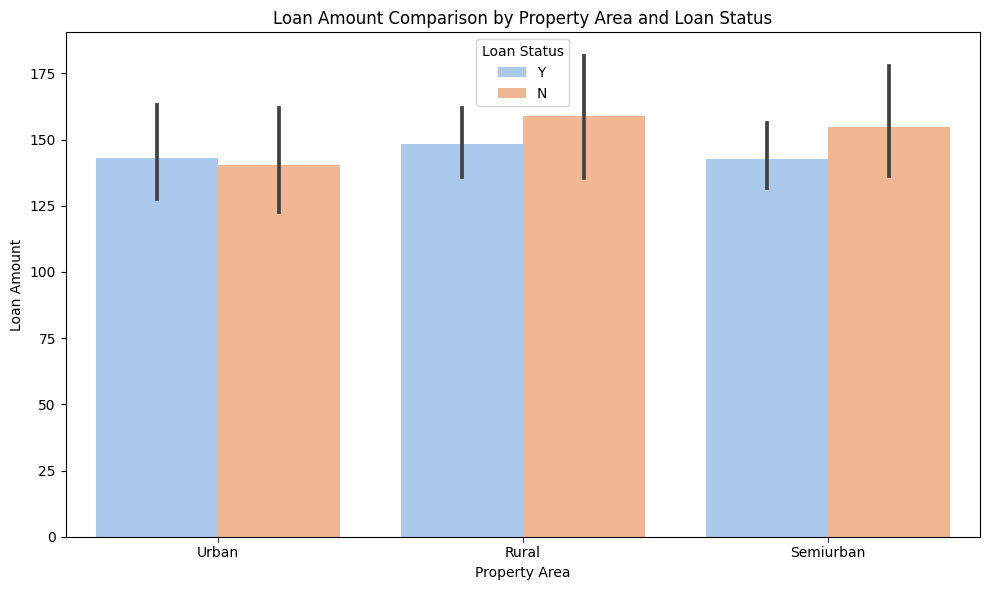

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure and axes
plt.figure(figsize=(10, 6))

# Grouped bar plot using Seaborn
ax = sns.barplot(data=df, x='Property_Area', y='LoanAmount', hue='Loan_Status')

# Customizing the plot
ax.set_xlabel('Property Area')
ax.set_ylabel('Loan Amount')
ax.set_title('Loan Amount Comparison by Property Area and Loan Status')

# Show the legend
ax.legend(title='Loan Status')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()


As we can see from the graph above, customers applying for a Loan from the Rural area get denied more often than Urban and Semiurban areas.

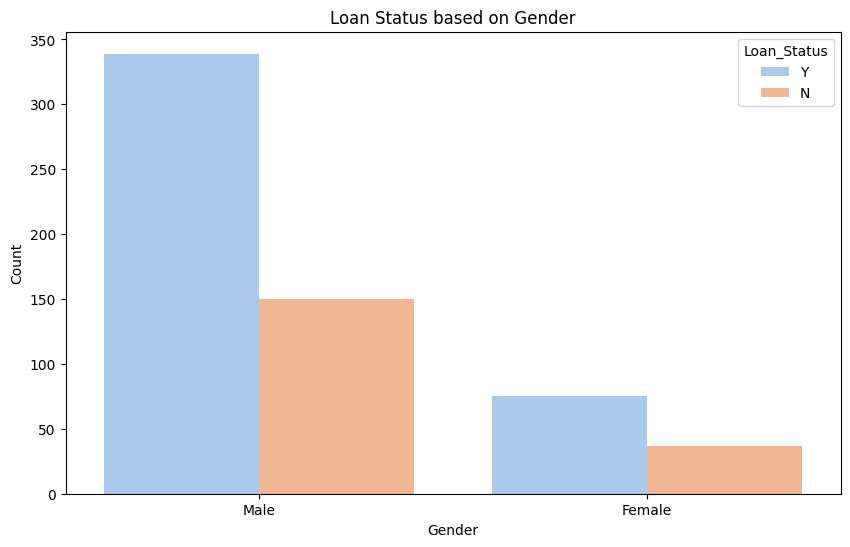

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Loan Status based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Percentage of approved loans for Female: 66.96%
Percentage of approved loans for Male: 69.33%


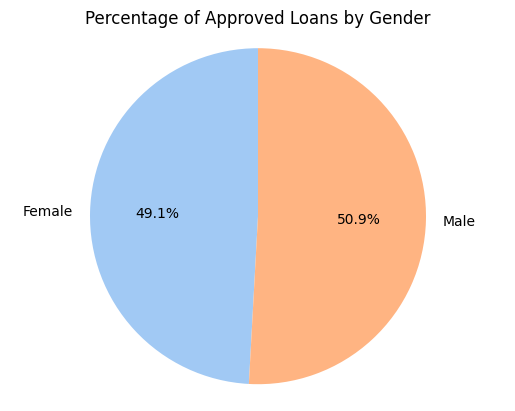

In [23]:
# Calculate counts of approved loans for each gender
approved_counts = df[df['Loan_Status'] == 'Y'].groupby('Gender').size()

# Calculate total counts of loans for each gender
total_counts = df.groupby('Gender').size()

# Calculate percentages
percentages = (approved_counts / total_counts) * 100

# Displaying the results
for gender, percentage in percentages.items():
    print(f"Percentage of approved loans for {gender}: {percentage:.2f}%")

# Plotting the data as a pie chart
fig, ax = plt.subplots()
ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Percentage of Approved Loans by Gender')
plt.show()


## Explanatory Data Analysis

### Custom Functions

#### Univariate

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# exploring categorical
def explore_categorical(df, x, fillna=True, placeholder='MISSING',
                        figsize=(6,4), order=None):

  # making a copy of the dataframe and na
  temp_df = df.copy()

  # before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_percent = null_count/len(temp_df) * 100

  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # create a figure with desired size
  fig, ax = plt.subplots(figsize=figsize)

  # plotting the countplot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # rotating tick labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # adding a title with the feature name included
  ax.set_title(f'Column: {x}', fontweight='bold')

  # fixing layout and showing plot
  fig.tight_layout()
  plt.show()

  # printing null value info
  print(f"- NaN's found: {null_count} ({null_percent:.2f}%)")

  # print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # fing value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)

  # define most common value
  most_common_val = val_counts.index[0]

  # define the frequency of the most common value
  freq = val_counts.values[0]

  # calculate the percentage of the most common value
  percent_most_common = freq / len(temp_df) * 100

  # print the results
  print(f"- Most common Value: '{most_common_val}' occurs {freq} times ({percent_most_common:.2f}%)")

  # print message if quasi-constant or constan (greater than 98% of data)
  if percent_most_common > 98:
    print("\n - [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print('- Not constant or quasi-constant')

  # returning fig, ax
  return fig, ax

# exploring numeric
def explore_numeric(df, x, figsize=(6,5)):

  # making our figure with gridspec for suubplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)

  # histogram on top
  sns.histplot(data=df, x=x, ax=axes[0])

  # boxplot on bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  # adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  # adjusting subplots to best fill figure
  fig.tight_layout()

  # ensure plot is shown before message
  plt.show()

  # print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_percent = null_count / len(df) * 100
  print(f"- NaN's found: {null_count} ({null_percent:.2f}%)")

#### Multivariate

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


# plotting categorical vs target
def plot_categorical_vs_target(df, x, y='SalePrice', figsize=(6,4),
                               fillna=True, placeholder='MISSING',
                               order=None):

# make a temp copy of the dataframe and fillna
  temp_df = df.copy()

# fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
# or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])

# create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

# barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
            linewidth=1, edgecolor='black', errorbar=None)

# boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
              order=order, hue_order=order, legend=False,
              edgecolor='white', linewidth=0.5, size=3,
              zorder=0)

# rotating the x labels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# adding a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

# plotting numeric vs target
def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4)):

  # calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white', 'lw':1, 'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  # adding the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

## Transforming Train/Test Data

### Importing Libraries

In [26]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# model libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# classification metrics libraries
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

### Identifying features and Target

In [27]:
# Target and Features
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1})

target = 'Loan_Status'

X = df.drop(columns=[target, 'Loan_Status'])

y = df[target]

In [28]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

In [29]:
X_train.isna().sum()

Gender              10
Married              1
Dependents          10
Education            0
Self_Employed       14
LoanAmount          14
Loan_Amount_Term    10
Credit_History      29
Property_Area        0
TotalIncome          0
dtype: int64

### Creating a Numeric Preprocessor

In [45]:
#######################################

# Assigning number columns
num_cols = X_train.select_dtypes('number').columns
print('Numeric Columns', num_cols)

# Instantiate Scaler
scaler = StandardScaler()
impute_median = SimpleImputer(strategy='median')

# Creating a pipeline
num_pipe = make_pipeline(impute_median, scaler)

# Creating a number tuple
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

Numeric Columns Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome'], dtype='object')


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome'], dtype='object'))

### Creating a Categorical Preprocessor

In [46]:
# Preprocessing Pipeline for One Hot Encoded Data
ohe_cols = X_train.select_dtypes('object').columns
ohe_cols

# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value='NA')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Make pipeline with impute and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)

# Making a One Hot Encoded tuple
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'Property_Area'],
       dtype='object'))

### Column Transformer

In [47]:
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [48]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))],
                  verbose_feature_names_out=False)

#### Custom Function

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):

  # Get the classification report
  report = classification_report(y_true, y_pred)

  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)

  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)

  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()

  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):

  # Get predictions for training data
  y_train_pred = model.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()

  # Get predictions for test data
  y_test_pred = model.predict(X_test)

  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )

  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

## Models

### KNeighbor Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate default KNN
knn = KNeighborsClassifier()

# define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)

# fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.53      0.66       107
           1       0.83      0.97      0.90       261

    accuracy                           0.84       368
   macro avg       0.85      0.75      0.78       368
weighted avg       0.84      0.84      0.83       368



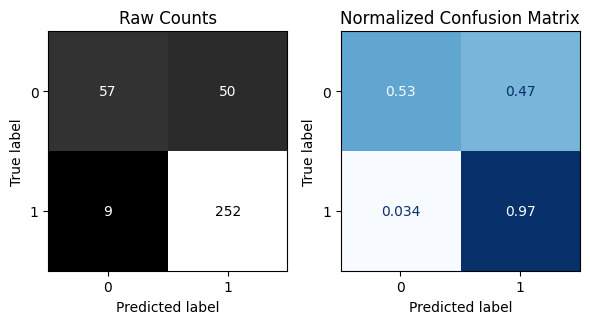


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.46      0.60        85
           1       0.77      0.96      0.85       161

    accuracy                           0.78       246
   macro avg       0.81      0.71      0.72       246
weighted avg       0.80      0.78      0.76       246



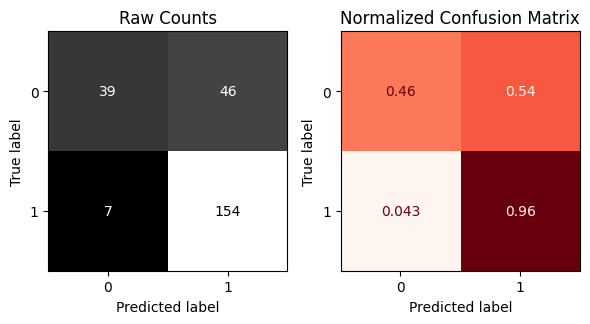

In [51]:
# obtain evaluation metrics using custom functions
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

#### Tuning

In [52]:
# making every other value from the range (odd values)
nneighbors_list = list(range(1, 51, 2))

# create a param grid
params = {'kneighborsclassifier__n_neighbors': nneighbors_list,
          'kneighborsclassifier__weights': ['distance','uniform']}

# instantiate gridsearch
knn_gs = GridSearchCV(knn_pipe, params, verbose=5, n_jobs=-1,
                  scoring='recall_macro')

# fit gs on training data
knn_gs.fit(X_train, y_train)

# creating value for best estimator
knn_best_est = knn_gs.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [53]:
# getting best params
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 17,
 'kneighborsclassifier__weights': 'uniform'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.42      0.57       107
           1       0.81      0.98      0.88       261

    accuracy                           0.82       368
   macro avg       0.85      0.70      0.73       368
weighted avg       0.83      0.82      0.79       368



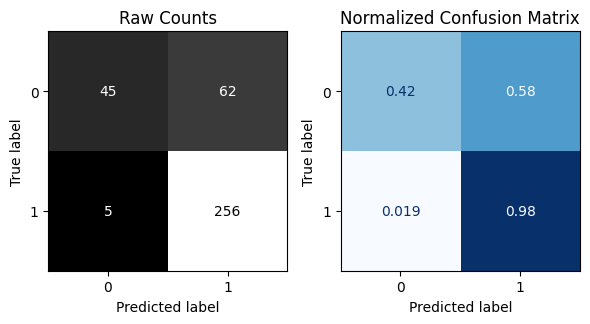


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.42      0.59        85
           1       0.77      0.99      0.86       161

    accuracy                           0.80       246
   macro avg       0.87      0.71      0.73       246
weighted avg       0.84      0.80      0.77       246



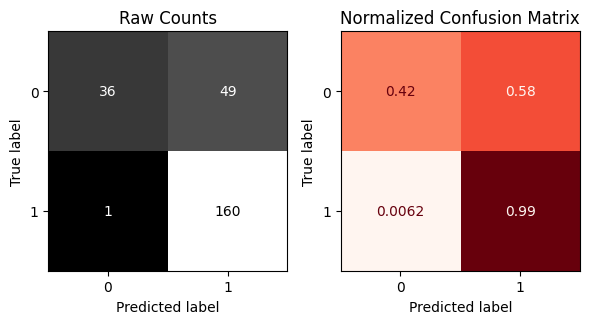

In [54]:
# obtain complete evaluation for best performing model
evaluate_classification(knn_best_est, X_train, y_train, X_test, y_test)

### Decision Tree Classifier

In [55]:
dt = DecisionTreeClassifier()

dt_pipe = make_pipeline(preprocessor, dt)

dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       261

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



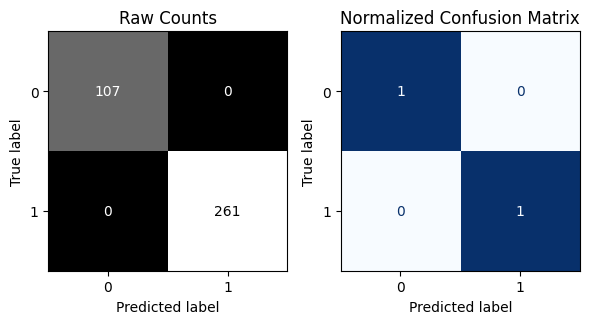


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.47      0.50        85
           1       0.74      0.79      0.76       161

    accuracy                           0.68       246
   macro avg       0.64      0.63      0.63       246
weighted avg       0.67      0.68      0.67       246



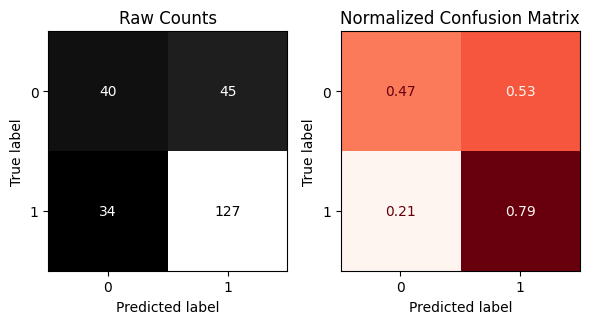

In [56]:
evaluate_classification(dt_pipe, X_train, y_train, X_test, y_test)

#### Tuning

In [57]:
# Define the hyperparameter grid for the DecisionTreeClassifier
param_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15, 20],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.55      0.69       107
           1       0.84      0.98      0.91       261

    accuracy                           0.86       368
   macro avg       0.88      0.77      0.80       368
weighted avg       0.87      0.86      0.84       368



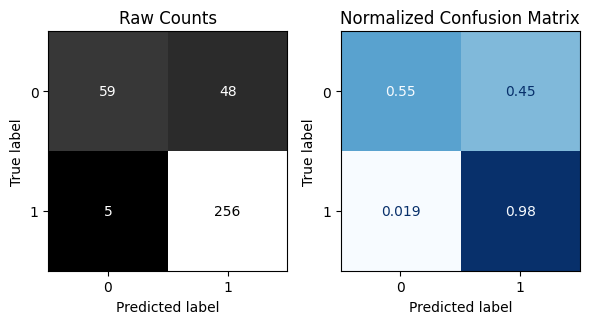


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.41      0.52        85
           1       0.75      0.91      0.82       161

    accuracy                           0.74       246
   macro avg       0.73      0.66      0.67       246
weighted avg       0.74      0.74      0.72       246



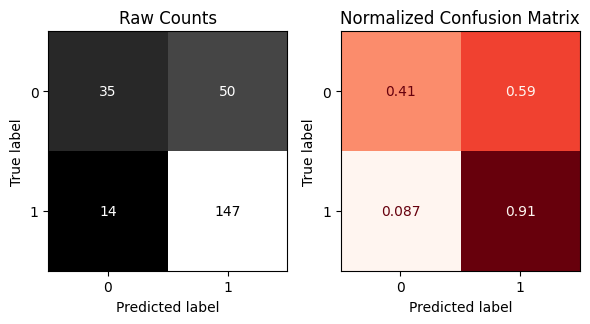

In [58]:
evaluate_classification(best_model, X_train, y_train, X_test, y_test)

### Logistic Regression

In [59]:
# creating a logistic regression model
lr = LogisticRegression(random_state=42)

# creating the pipe
lr_pipe = make_pipeline(preprocessor, lr)

# fitting the pipe onto the training data
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.43      0.58       107
           1       0.81      0.98      0.89       261

    accuracy                           0.82       368
   macro avg       0.85      0.71      0.73       368
weighted avg       0.84      0.82      0.80       368



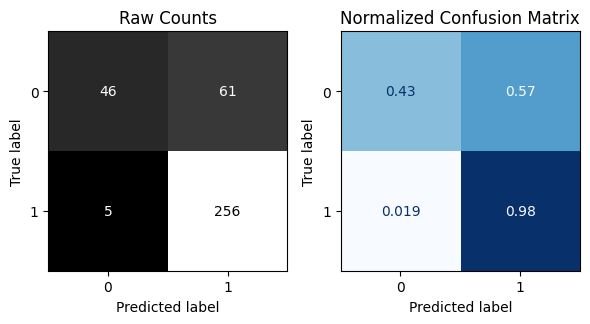


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        85
           1       0.77      0.99      0.86       161

    accuracy                           0.80       246
   macro avg       0.86      0.71      0.73       246
weighted avg       0.83      0.80      0.77       246



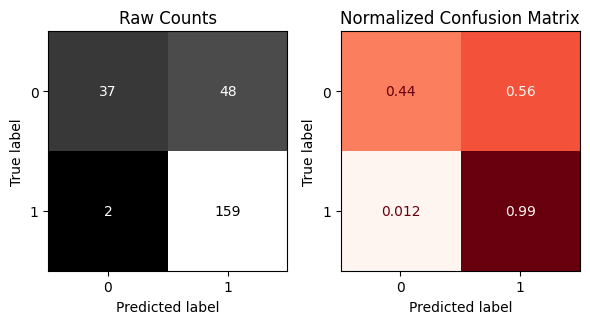

In [60]:
evaluate_classification(lr_pipe, X_train, y_train, X_test, y_test)

#### Tuning

In [61]:
# Create a dictionary of parameters
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [62]:
# Tune hyperparameters with GridSearchCV
lr_gs = GridSearchCV(lr_pipe, params)
lr_gs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Simple...
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]})

In [63]:
# setting best estimators to best_lr
best_lr = lr_gs.best_estimator_

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.42      0.57       107
           1       0.81      0.98      0.88       261

    accuracy                           0.82       368
   macro avg       0.85      0.70      0.73       368
weighted avg       0.83      0.82      0.79       368



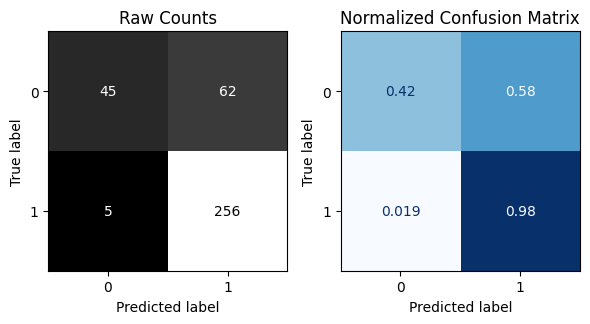


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        85
           1       0.77      0.99      0.86       161

    accuracy                           0.80       246
   macro avg       0.86      0.71      0.73       246
weighted avg       0.83      0.80      0.77       246



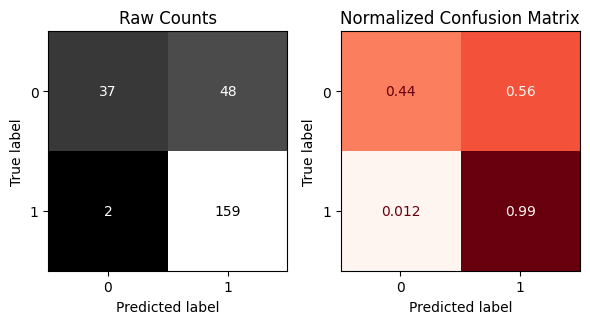

In [64]:
# evaluating the model
evaluate_classification(best_lr, X_train, y_train, X_test, y_test)

### LightGMB

In [65]:
lgbm = LGBMClassifier()

lgbm_pipe = make_pipeline(preprocessor, lgbm)

lgbm_pipe.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 261, number of negative: 107
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 368, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.709239 -> initscore=0.891692
[LightGBM] [Info] Start training from score 0.891692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('lgbmclassifier', LGBMClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       107
           1       0.96      1.00      0.98       261

    accuracy                           0.97       368
   macro avg       0.98      0.95      0.96       368
weighted avg       0.97      0.97      0.97       368



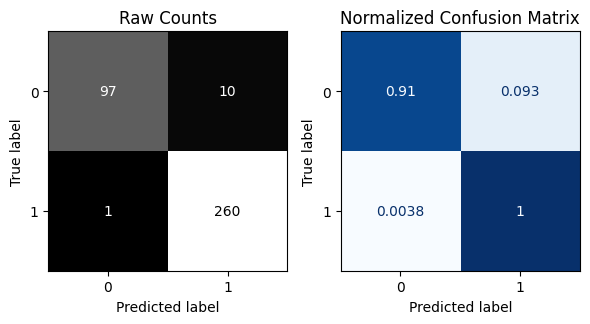


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.56      0.66        85
           1       0.80      0.92      0.86       161

    accuracy                           0.80       246
   macro avg       0.79      0.74      0.76       246
weighted avg       0.80      0.80      0.79       246



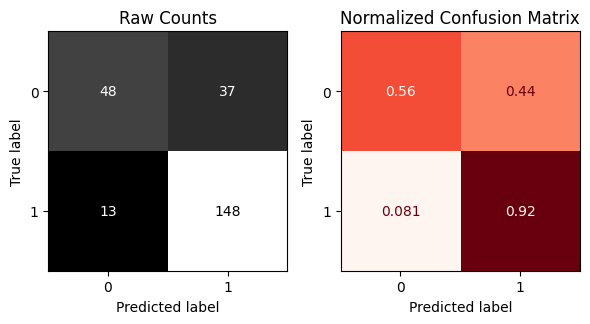

In [66]:
evaluate_classification(lgbm_pipe, X_train, y_train, X_test, y_test)

### Neural Network

In [67]:
# Importing Libraries and defining custom function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def plot_history(history):
  '''Takes a keras model learning history and plots each metric'''

  metrics_names = history.history.keys()

  for metric in metrics_names:
    if not 'val' in metric:
      plt.plot(history.history[f'{metric}'], label=f'{metric}')
      if f'val_{metric}' in metrics_names:
        plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

##### Network Model

In [68]:
# Saving the transformed training data
X_train_proc = preprocessor.transform(X_train)

# Saving the transformed testing data
X_test_proc = preprocessor.transform(X_test)

In [69]:
# Scale the data
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train_proc)
X_test_sc = scaler.transform(X_test_proc)

In [70]:
# create the model architecture

input_dim = X_train_sc.shape[1]

model = Sequential()

model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [71]:
# Since this ia a classification problem, only classification metrics should be used

#compile model with metrics

model.compile(loss='bce', optimizer='adam', metrics=['accuracy',
                                                         metrics.Precision(),
                                                         metrics.Recall()])

In [72]:
history = model.fit(X_train_sc, y_train,
                        validation_data=(X_test_sc, y_test),
                        epochs=100,
                        verbose=0)

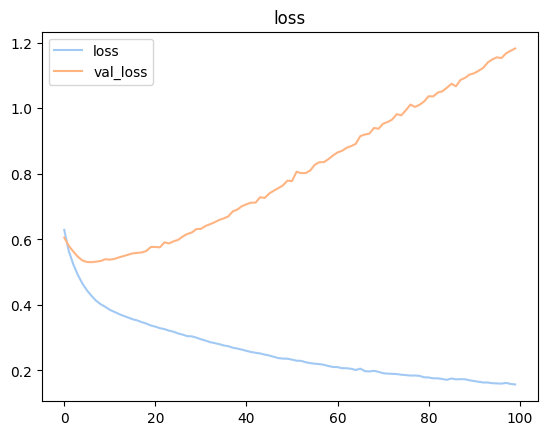

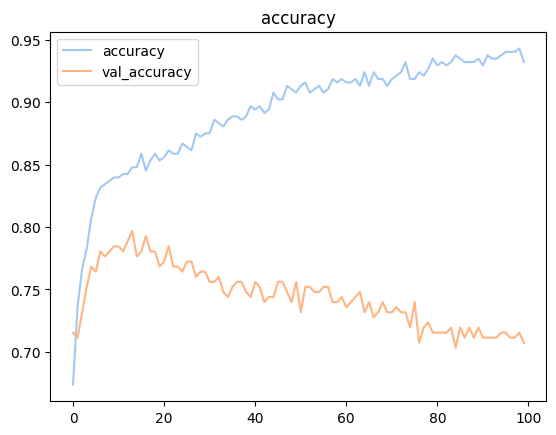

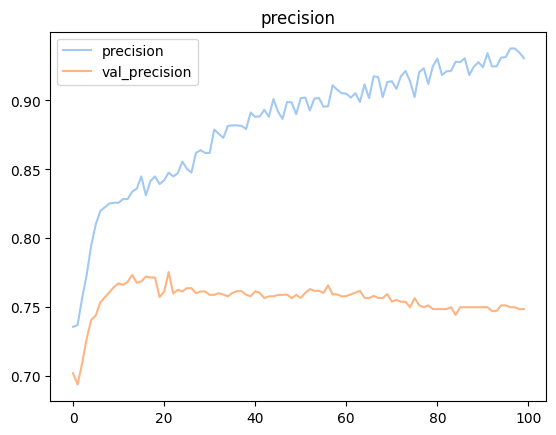

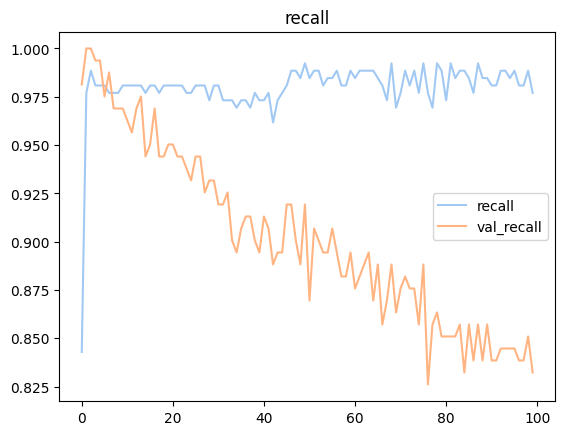

In [73]:
# plotting the learning history
plot_history(history)

8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        85
           1       0.75      0.83      0.79       161

    accuracy                           0.71       246
   macro avg       0.67      0.65      0.66       246
weighted avg       0.70      0.71      0.70       246



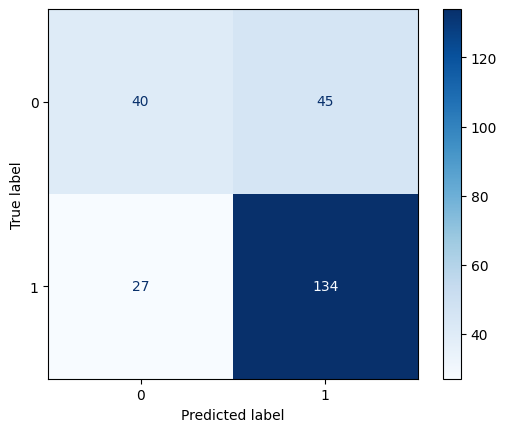

In [74]:
# evaluate model

# make predictions
y_preds = model.predict(X_test_sc)

# round the predictions
y_preds = np.round(y_preds)

print(classification_report(y_test, y_preds))

ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Blues');

### XGBoost

In [75]:
# Instantiate and fit gradient boosting classifier
xgb = XGBClassifier(n_estimators=200, max_depth=1)

xgb_pipe = make_pipeline(preprocessor, xgb)

xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=1, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.49      0.63       107
           1       0.82      0.97      0.89       261

    accuracy                           0.83       368
   macro avg       0.85      0.73      0.76       368
weighted avg       0.84      0.83      0.81       368



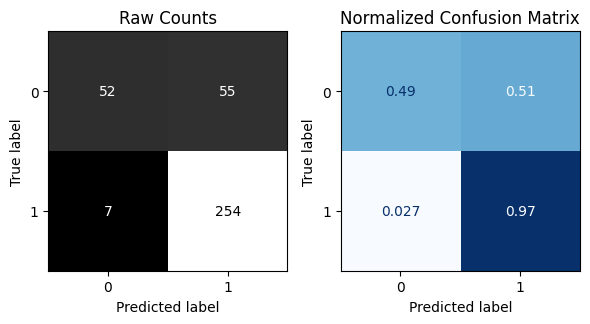


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.45      0.59        85
           1       0.77      0.97      0.86       161

    accuracy                           0.79       246
   macro avg       0.83      0.71      0.73       246
weighted avg       0.81      0.79      0.77       246



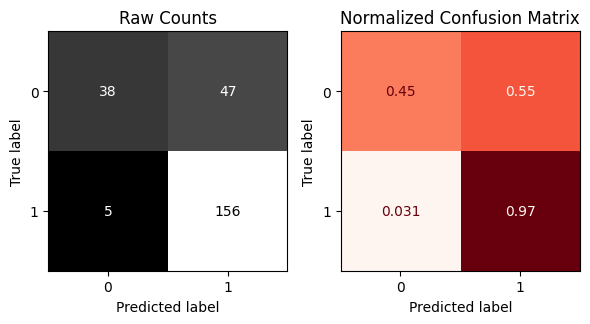

In [76]:
evaluate_classification(xgb_pipe, X_train, y_train, X_test, y_test)

In [77]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Define parameter grid
param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__reg_alpha': [0, 0.1, 0.5],
    'xgbclassifier__reg_lambda': [0, 0.1, 0.5]
}

# Create XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Create a pipeline with the preprocessor and the XGBClassifier
xgb_pipe = make_pipeline(preprocessor, xgb_model)

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_pipe, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get best hyperparameters and best model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

# Evaluate on test data
test_accuracy = best_xgb_model.score(X_test, y_test)
print(f"Best Model Test Accuracy: {test_accuracy:.4f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Model Test Accuracy: 0.7805


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       261

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



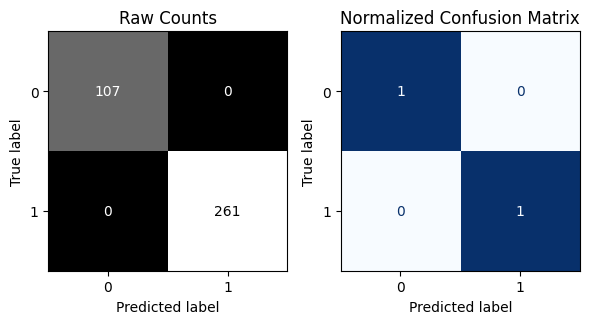


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.53      0.62        85
           1       0.79      0.91      0.84       161

    accuracy                           0.78       246
   macro avg       0.77      0.72      0.73       246
weighted avg       0.78      0.78      0.77       246



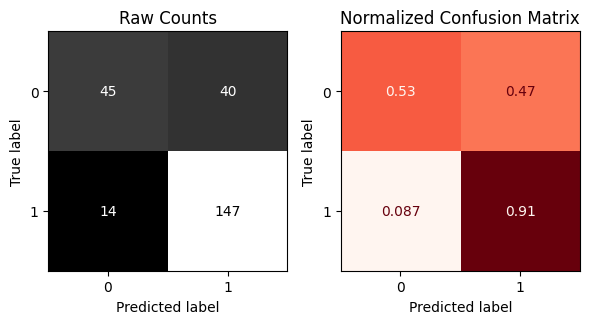

In [78]:
evaluate_classification(best_xgb_model, X_train, y_train, X_test, y_test)